In [2]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.optimizers import Adam
import semseglib

In [17]:
model = semseglib.models.unet((256,256,3), 4, 16, block_type="atrous", batchnorm=True, downsampling="conv1x1", 
                              classes=2, dilations=(1, 3, 15, 31))

In [18]:
X = np.random.normal(loc=0.5, scale=0.1, size=(20,256,256,3))
y = np.zeros((20,256,256,3))

for i in range(20):
    width_v = np.random.choice(np.arange(100))
    start_v = np.random.choice(np.arange(256 - width_v))
    channel_v = np.random.choice(np.arange(3))
    
    X[i, :, start_v:start_v+width_v, channel_v] = 0
    y[i, :, start_v:start_v+width_v, 0] = 1
    
    width_h = np.random.choice(np.arange(100))
    start_h = np.random.choice(np.arange(256 - width_h))
    channel_h = np.random.choice(np.arange(3))
    
    # Prevent overlap
    X[i, start_h:start_h+width_h, :start_v, channel_h] = 0
    y[i, start_h:start_h+width_h, :start_v, 1] = 1
    X[i, start_h:start_h+width_h, start_v+width_v:, channel_h] = 0
    y[i, start_h:start_h+width_h, start_v+width_v:, 1] = 1
    
    y[i, :, :, 2] = np.all(X[i, :, :], axis=-1)

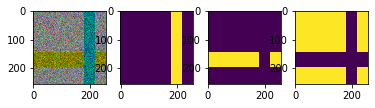

In [19]:
fig, ax = plt.subplots(1, 4)
ax[0].imshow(X[0])
ax[1].imshow(y[0, :, :, 0].reshape((256,256)))
ax[2].imshow(y[0, :, :, 1].reshape((256,256)))
ax[3].imshow(y[0, :, :, 2].reshape((256,256)))

In [20]:
model.compile(Adam(), loss=semseglib.losses.generalized_dice_loss, metrics=[semseglib.losses.generalized_dice_coeff])

In [21]:
model.fit(X, y, batch_size=4, epochs=5)

Epoch 1/5
20/20 [==============================] - 89s 4s/step - loss: 0.4384 - generalized_dice_coeff: 0.5616
Epoch 2/5
20/20 [==============================] - 80s 4s/step - loss: 0.2054 - generalized_dice_coeff: 0.7946
Epoch 3/5
20/20 [==============================] - 87s 4s/step - loss: 0.1993 - generalized_dice_coeff: 0.8007
Epoch 4/5
20/20 [==============================] - 83s 4s/step - loss: 0.1926 - generalized_dice_coeff: 0.8074
Epoch 5/5
20/20 [==============================] - 81s 4s/step - loss: 0.1854 - generalized_dice_coeff: 0.8146


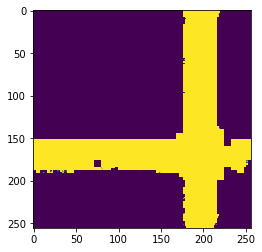

In [22]:
plt.imshow(model.predict(np.array([X[0],]))[0, :, :, 0].reshape((256,256)))

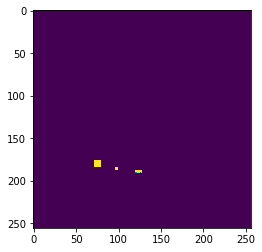

In [23]:
plt.imshow(model.predict(np.array([X[0],]))[0, :, :, 1].reshape((256,256)))